In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
wifi_locations = pd.read_csv('../data/metro_public_wi-fi_locations.csv')
print(wifi_locations.shape)
wifi_locations.head(3)

(103, 10)


,Site Name,Site Type,Street Address,City,State,ZIP,Mapped Location,location,lat,lng
0,Andrew Jackson Courts,Public Gathering,1457 Jackson Street,Nashville,TN,37208,"1457 Jackson Street\nNashville, TN 37208\n(36....","(36.167733, -86.800501)",36.167733,-86.800501
1,Antioch Community Center,Regional Community Center,5023 Blue Hole Road,Antioch,TN,37013,"5023 Blue Hole Road\nAntioch, TN 37013\n(36.05...","(36.055271, -86.672392)",36.055271,-86.672392
2,Azafran Park,Public Gathering,2187 Nolensville Pike,Nashville,TN,37211,"2187 Nolensville Pike\nNashville, TN 37211\n(3...","(36.127313, -86.753363)",36.127313,-86.753363


In [4]:
wifi_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site Name        103 non-null    object 
 1   Site Type        103 non-null    object 
 2   Street Address   103 non-null    object 
 3   City             103 non-null    object 
 4   State            103 non-null    object 
 5   ZIP              103 non-null    int64  
 6   Mapped Location  103 non-null    object 
 7   location         103 non-null    object 
 8   lat              78 non-null     float64
 9   lng              78 non-null     float64
dtypes: float64(2), int64(1), object(7)
memory usage: 8.2+ KB


In [5]:
wifi_locations['geometry'] = wifi_locations.apply(lambda x: Point((x.lng, 
                                                         x.lat)),axis=1)
wifi_locations.head(10)


,Site Name,Site Type,Street Address,City,State,ZIP,Mapped Location,location,lat,lng,geometry
0,Andrew Jackson Courts,Public Gathering,1457 Jackson Street,Nashville,TN,37208,"1457 Jackson Street\nNashville, TN 37208\n(36....","(36.167733, -86.800501)",36.167733,-86.800501,POINT (-86.800501 36.167733)
1,Antioch Community Center,Regional Community Center,5023 Blue Hole Road,Antioch,TN,37013,"5023 Blue Hole Road\nAntioch, TN 37013\n(36.05...","(36.055271, -86.672392)",36.055271,-86.672392,POINT (-86.672392 36.055271)
2,Azafran Park,Public Gathering,2187 Nolensville Pike,Nashville,TN,37211,"2187 Nolensville Pike\nNashville, TN 37211\n(3...","(36.127313, -86.753363)",36.127313,-86.753363,POINT (-86.75336299999999 36.127313)
3,Beaman Nature Center,Regional Community Center,5911 Old Hickory Blvd,Nashville,TN,37015,"5911 Old Hickory Blvd\nNashville, TN 37015\n(3...","(36.260013, -86.893379)",36.260013,-86.893379,POINT (-86.893379 36.260013)
4,Bellevue Community Center,Regional Community Center,656 Colice Jeanne Road,Nashville,TN,37221,"656 Colice Jeanne Road\nNashville, TN 37221\n(...","(36.072144, -86.934617)",36.072144,-86.934617,POINT (-86.934617 36.072144)
5,Bellevue Library,Library,720 Baugh Road,Nashville,TN,37221,"720 Baugh Road\nNashville, TN 37221\n(36.06910...","(36.069103, -86.936514)",36.069103,-86.936514,POINT (-86.936514 36.069103)
6,Bells Bend Nature Center,Regional Community Center,4187 Old Hickory Blvd,Nashville,TN,37218,"4187 Old Hickory Blvd\nNashville, TN 37218\n(3...","(36.154655, -86.920344)",36.154655,-86.920344,POINT (-86.920344 36.154655)
7,Ben West Building,Public Gathering,100 James Robertson Pkwy,Nashville,TN,37219,"100 James Robertson Pkwy\nNashville, TN 37219\...","(36.167948, -86.777955)",36.167948,-86.777955,POINT (-86.77795500000001 36.167948)
8,Bordeaux Library,Library,4000 Clarksville Pike,Nashville,TN,37218,"4000 Clarksville Pike\nNashville, TN 37218\n(3...","(36.211613, -86.838764)",36.211613,-86.838764,POINT (-86.838764 36.211613)
9,Centennial Performing Arts Studio,Regional Community Center,2500 West End Avenue,Nashville,TN,37208,"2500 West End Avenue\nNashville, TN 37208\n(36...","(36.146585, -86.809194)",36.146585,-86.809194,POINT (-86.80919400000001 36.146585)


In [6]:
wifi_geo = gpd.GeoDataFrame(wifi_locations, 
                           crs = zipcodes.crs, 
                           geometry = wifi_locations['geometry'])

In [7]:
type(wifi_geo)

geopandas.geodataframe.GeoDataFrame

In [8]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [9]:
wifi_by_zip = gpd.sjoin(wifi_geo, zipcodes, op = 'within')

In [10]:
wifi_by_zip.head(10)

,Site Name,Site Type,Street Address,City,State,ZIP,Mapped Location,location,lat,lng,geometry,index_right,zip,po_name
0,Andrew Jackson Courts,Public Gathering,1457 Jackson Street,Nashville,TN,37208,"1457 Jackson Street\nNashville, TN 37208\n(36....","(36.167733, -86.800501)",36.167733,-86.800501,POINT (-86.80050 36.16773),40,37208,NASHVILLE
12,Cheatham Place,Public Gathering,1564 9th Ave North,Nashville,TN,37208,"1564 9th Ave North\nNashville, TN 37208\n(36.1...","(36.178322, -86.798479)",36.178322,-86.798479,POINT (-86.79848 36.17832),40,37208,NASHVILLE
28,Elizabeth Community Center,Regional Community Center,1701 Arthur Avenue,Nashville,TN,37208,"1701 Arthur Avenue\nNashville, TN 37208\n(36.1...","(36.179199, -86.803434)",36.179199,-86.803434,POINT (-86.80343 36.17920),40,37208,NASHVILLE
35,Hadley Park Library,Library,1039 28th Avenue North,Nashville,TN,37208,"1039 28th Avenue North\nNashville, TN 37208\n(...","(36.166862, -86.820519)",36.166862,-86.820519,POINT (-86.82052 36.16686),40,37208,NASHVILLE
60,Morgan Park Community Center,Regional Community Center,411 Hume Street,Nashville,TN,37208,"411 Hume Street\nNashville, TN 37208\n(36.1807...","(36.180791, -86.790967)",36.180791,-86.790967,POINT (-86.79097 36.18079),40,37208,NASHVILLE
64,North Library,Library,1001 Monroe Street,Nashville,TN,37208,"1001 Monroe Street\nNashville, TN 37208\n(36.1...","(36.174397, -86.796001)",36.174397,-86.796001,POINT (-86.79600 36.17440),40,37208,NASHVILLE
65,North Police Precinct,Public Gathering,"2231 26th Avenue, North",Nashville,TN,37208,"2231 26th Avenue, North\nNashville, TN 37208\n...","(36.189673, -86.817971)",36.189673,-86.817971,POINT (-86.81797 36.18967),40,37208,NASHVILLE
95,Water Services Biosolids Building,Public Gathering,1810 Cement Plant Rd,Nashville,TN,37208,"1810 Cement Plant Rd\nNashville, TN 37208\n(36...","(36.184951, -86.786356)",36.184951,-86.786356,POINT (-86.78636 36.18495),40,37208,NASHVILLE
96,Water Services Customer Service Center,Public Gathering,"1700 Third Avenue, North",Nashville,TN,37208,"1700 Third Avenue, North\nNashville, TN 37208\...","(36.183295, -86.790015)",36.183295,-86.790015,POINT (-86.79001 36.18330),40,37208,NASHVILLE
1,Antioch Community Center,Regional Community Center,5023 Blue Hole Road,Antioch,TN,37013,"5023 Blue Hole Road\nAntioch, TN 37013\n(36.05...","(36.055271, -86.672392)",36.055271,-86.672392,POINT (-86.67239 36.05527),51,37013,ANTIOCH


In [11]:
wifi_by_zip['zip'].value_counts()

37201    10
37208     9
37203     7
37206     7
37211     6
37210     5
37013     4
37209     3
37076     3
37218     3
37207     3
37221     3
37115     3
37216     2
37217     2
37138     2
37214     1
37072     1
37219     1
37204     1
37228     1
37080     1
Name: zip, dtype: int64

In [12]:
wifi_in_37201 = wifi_by_zip.loc[wifi_by_zip['zip'] == '37201']
wifi_in_37201.shape

(10, 14)

In [13]:
polygon37201 = zipcodes.loc[zipcodes['zip'] == '37201']
polygon37201.shape

(1, 3)

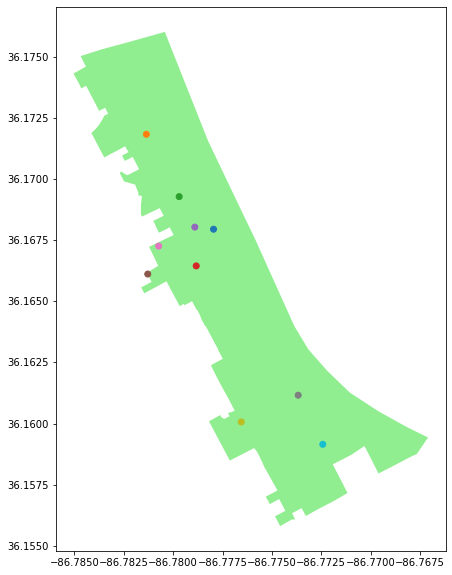

In [14]:
ax = polygon37201.plot(figsize = (8, 10), color = 'lightgreen')
wifi_in_37201.plot( ax = ax, column = 'Site Name');
plt.show();

In [15]:
center=polygon37201.geometry.centroid
print(center)

36    POINT (-86.77702 36.16557)
dtype: geometry


C:\Users\iulia\AppData\Local\Temp\ipykernel_6168\2900504606.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center=polygon37201.geometry.centroid


In [16]:
area_center = [center.y, center.x]
print(area_center)

[36    36.165574
dtype: float64, 36   -86.777018
dtype: float64]


In [17]:
map_37201 = folium.Map(location =  area_center, zoom_start = 12)
map_37201

In [18]:
i = 0
for row_index, row_values in wifi_in_37201.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 7
values are:
 
Site Name                                          Ben West Building
Site Type                                           Public Gathering
Street Address                              100 James Robertson Pkwy
City                                                       Nashville
State                                                             TN
ZIP                                                            37219
Mapped Location    100 James Robertson Pkwy\nNashville, TN 37219\...
location                                     (36.167948, -86.777955)
lat                                                        36.167948
lng                                                       -86.777955
geometry                        POINT (-86.77795500000001 36.167948)
index_right                                                       36
zip                                                            37201
po_name                                                    NASHVILLE
Name: 7, 

In [19]:
#draw our zip code area: 37201
wifi_map_37201 = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(polygon37201).add_to(map_37201)

#iterate through stops_in_37201 to create locations and markers 
#for each wifi location
#remember for Folium locations, lat is listed first!!

for row_index, row_values in wifi_in_37201.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Site Name'])
    icon=folium.Icon(color="blue",icon="wifi", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(wifi_map_37201)
wifi_map_37201.save('../maps/wifi_map37201.html')

#display our map
wifi_map_37201

In [20]:
cluster_wifi_map_37201 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_wifi_map_37201)

folium.GeoJson(polygon37201).add_to(cluster_wifi_map_37201)

# inside the loop add each marker to the cluster
for row_index, row_values in wifi_in_37201.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Site Name'])
    icon=folium.Icon(color="blue",icon="wifi", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_wifi_map_37201.save('../maps/cluster_wifi_map_37201.html')

cluster_wifi_map_37201 

In [21]:
#draw our zip code area: 37207
wifi_map_37201 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37201).add_to(wifi_map_37201)

#create a list of locations and pass them to FastMarkerCluster()
locations = wifi_in_37201[['lat', 'lng']].values.tolist()
wifi_map_37201.add_child(
    FastMarkerCluster(locations)
)



#display our map
wifi_map_37201